In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yt_ds = pd.read_csv('/content/top-5000-youtube-channels.csv')
yt_ds.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


# Basic Understanding of Our dataset and simple analysis

In [3]:
yt_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [4]:
yt_ds.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
yt_ds.shape

(5000, 6)

# Data Cleaning  (Replace '--'  to NaN)

In [6]:
yt_ds =yt_ds.replace('--',np.nan,regex=True)

# Check Null Values In The Dataset

In [7]:
yt_ds.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [8]:
yt_ds.dropna(axis=0,inplace=True)

# Data Cleaning [ Rank Column

In [9]:
yt_ds['Rank'] =yt_ds['Rank'].str[0:-2]
yt_ds['Rank'] =yt_ds['Rank'].str.replace(',','').astype('int')

In [10]:
yt_ds.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

#  Data Cleaning [ Video Uploads & Subscribers ]

In [11]:
yt_ds['Subscribers'].astype('int')

0       18752951
1       61196302
2       19238251
3       31180559
4       32852346
          ...   
4995     2072942
4996     1055091
4997     3265735
4998       32990
4999       21172
Name: Subscribers, Length: 4610, dtype: int64

In [12]:
yt_ds['Video Uploads'] =yt_ds['Video Uploads'].astype('int')

# Data Cleaning [ Grade Column ]

In [13]:
yt_ds['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [14]:
yt_ds['Grade']=yt_ds['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [15]:
yt_ds['Grade'].astype('int')

0       5
1       5
2       5
3       5
4       5
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: Grade, Length: 4610, dtype: int64

# Find Average Views For Each Channel

In [16]:
yt_ds['avg_views'] = yt_ds['Video views']/yt_ds['Video Uploads']

In [17]:
yt_ds.head()


,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_views
0,1,5,Zee TV,82757,18752951,20869786591,2.521815e+05
1,2,5,T-Series,12661,61196302,47548839843,3.755536e+06
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,2.625551e+07
3,4,5,SET India,27323,31180559,22675948293,8.299216e+05
4,5,5,WWE,36756,32852346,26273668433,7.148130e+05


# Find Out Top Five Channels With Maximum Number of Video Uploads

In [18]:
yt_ds.sort_values(by='Video Uploads',ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_views
3453,3454,1,AP Archive,422326,746325,548619569,1299.042846
1149,1150,2,YTN NEWS,355996,820108,1640347646,4607.769879
2223,2224,1,SBS Drama,335521,1418619,1565758044,4666.646928
323,324,3,GMA News,269065,2599175,2786949164,10357.902975
2956,2957,1,MLB,267649,1434206,1329206392,4966.229622


# Find Correlation Matrix

In [19]:
yt_ds.corr()

<ipython-input-19-acdf2371a72a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  yt_ds.corr()


,Rank,Grade,Video Uploads,Video views,avg_views
Rank,1.000000,-0.865083,-0.073180,-0.402873,-0.153670
Grade,-0.865083,1.000000,0.088773,0.477423,0.155231
Video Uploads,-0.073180,0.088773,1.000000,0.087830,-0.064408
Video views,-0.402873,0.477423,0.087830,1.000000,0.294422
avg_views,-0.153670,0.155231,-0.064408,0.294422,1.000000


# Which Grade Has A Maximum Number of Video Uploads?

<Axes: xlabel='Grade', ylabel='Video Uploads'>

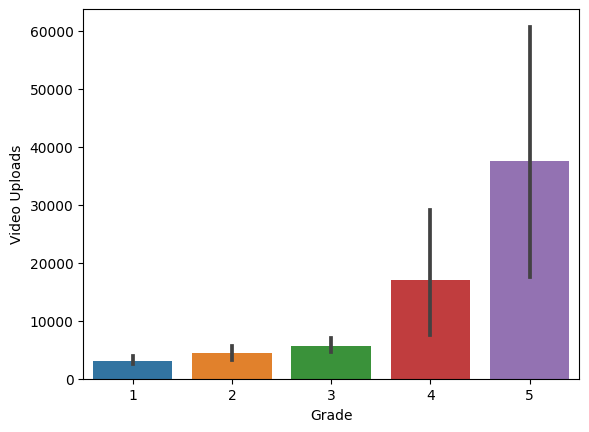

In [20]:
sns.barplot(x='Grade',y='Video Uploads',data=yt_ds)

# Which Grade Has The Highest Average Views?

<Axes: xlabel='Grade', ylabel='avg_views'>

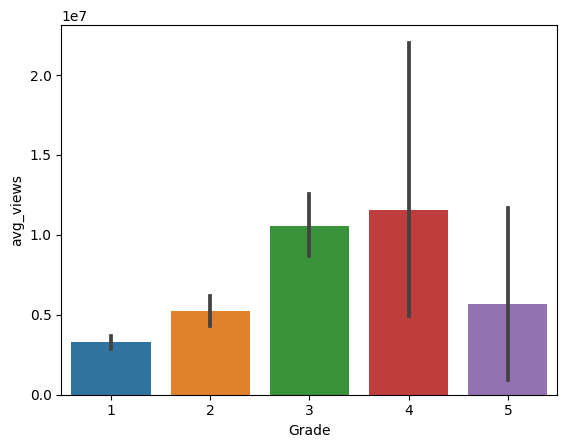

In [21]:
sns.barplot(x='Grade',y='avg_views',data=yt_ds)

# Which Grade Has The Highest Video Views?

In [26]:
yt_ds.groupby('Grade').mean()

<ipython-input-26-892176527f9f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yt_ds.groupby('Grade').mean()


,Rank,Video Uploads,Video views,avg_views
Grade,,,,
1,3520.537840,3136.157237,5.551838e+08,3.280381e+06
2,1533.988310,4382.582359,1.102450e+09,5.254804e+06
3,534.285396,5709.855072,2.497973e+09,1.054091e+07
4,31.325000,16960.300000,6.168742e+09,1.157708e+07
5,5.500000,37450.700000,2.119909e+10,5.688268e+06
